In [38]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,f1_score
import time

In [8]:
%matplotlib inline

## Exploratory Data Analysis 

In [24]:

def describeLablesDistribution(filename):    
   
    mnist_df = pd.read_csv(filename) 
    #Head
    print(mnist_df.head(4))
    
    
    rows,cols=mnist_df.shape    
    mnist_df.columns = ['Col'+str(i) for i in range(cols)]    
    print(mnist_df['Col0'].value_counts())
    df=mnist_df['Col0'].value_counts()
   
    # with pandas
    df=df.sort_index()
    df.plot(kind='bar')
    plt.ylabel('Frequency')
    plt.xlabel('Digit')
    plt.title('Histogram')
    
    print(mnist_df.Col0.describe())
    
def randomGuessing(train_X, train_y,val_X):
    output_values = train_y.copy()
    unique_labels = list(set(output_values))
    print(unique_labels)
    predictions = []
    for row in val_X:
        index = randrange(len(unique_labels))
        predictions.append(unique_labels[index])
    return predictions

def zeroRuleGuessing(train_X, train_y,val_X):
    output_values = train_y.copy()
    output_values=list(output_values)
    prediction = max(set(output_values), key=output_values.count)
    predictions = [prediction for i in range(len(val_X))]
    return predictions

def loadMNISTData(filename):    
    '''    
    train.csv:
    Column 1: Prediction label
    Column 2-785: Pixel values. 28*28 image flattened into a 784 dimensional vector.    
    '''    
    mnist_df = pd.read_csv(filename).values # Load the data
    mnist_X, mnist_y = mnist_df[:, 1:], mnist_df[:,0] # separate target from pixels
    
    return mnist_X, mnist_y 

def viewRandomImages(X):    
    '''
    We have a vector with 784 entries which represents all of the pixels in 
    one 28*28  image. Reshaping the image in a matrix we can then plot the image to classify.
    '''
    nfigs = 5
    fig = plt.figure(figsize=(10,10))
    for i in range(5*5):
     ax = fig.add_subplot(nfigs, nfigs, i+1)
     ax.imshow(X[i].reshape(28, 28))
    plt.axis('off') 
    plt.show() 

In [20]:
mnist_train_data=r'Datasets/q1/train.csv'

mnist_X, mnist_y = loadMNISTData(mnist_train_data)

print('Number of training samples')
print(len(mnist_X))

Number of training samples
19999


In [30]:
min_val=np.min(mnist_X[0])
max_val=np.max(mnist_X[0])

print('Min ,Max values of image',(min_val,max_val))

Min ,Max values of image (0, 255)


Normalizing the data. Most of the classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [31]:
mnist_X = mnist_X / 255

Checking if the CSV data is representing MNIST images 

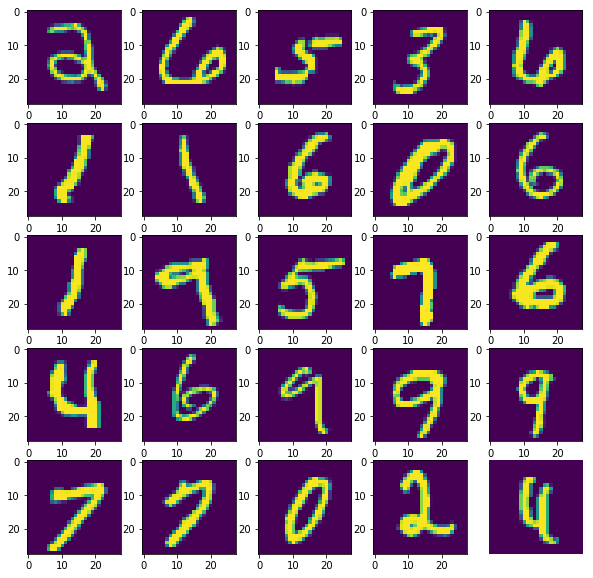

In [32]:
viewRandomImages(mnist_X)

Distribution of labels in the training dataset

   1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...    0.698  0.699  0.700  \
0  2  0    0    0    0    0    0    0    0    0  ...        0      0      0   
1  6  0    0    0    0    0    0    0    0    0  ...        0      0      0   
2  5  0    0    0    0    0    0    0    0    0  ...        0      0      0   
3  3  0    0    0    0    0    0    0    0    0  ...        0      0      0   

   0.701  0.702  0.703  0.704  0.705  0.706  0.707  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  

[4 rows x 785 columns]
1    2229
7    2129
0    2047
9    2028
3    2007
6    1976
2    1967
8    1950
4    1905
5    1761
Name: Col0, dtype: int64
count    19999.000000
mean         4.461223
std          2.908407
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: Col0, dt

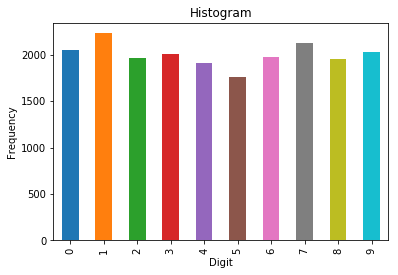

In [26]:
describeLablesDistribution(mnist_train_data)

In [35]:
#Splitting the given data into train and validation set in 75:25 split
(X_train, X_val, y_train, y_val) = train_test_split(mnist_X,  mnist_y, test_size=0.25, random_state=42)

Baseline performance using a dumb model is correct  ~10% of time in this case . This is matching with roughly same number(10) of class labels provided in the training dataset.

In [36]:
seed(2489)

pred_labels = randomGuessing(X_train, y_train,X_val)
print('\n Accuracy using Random guessing')
print(accuracy_score(y_val, pred_labels)*100.0)

pred_labels =zeroRuleGuessing(X_train, y_train,X_val)
print('\n Accuracy using Zero Rule Guessing')
print(accuracy_score(y_val, pred_labels)*100.0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 Accuracy using Random guessing
9.64

 Accuracy using Zero Rule Guessing
11.24


Using Sklearn for KNN Classification

In [40]:
start_time=time.time()
print(start_time)

1580487057.059665


In [41]:
error = []
accuracies=[]

# Calculating error for K values between 1 and 40
for i in range(3, 10,2):
    print('Processing with num clusters: ',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
    accuracies.append(np.mean(pred_i == y_val))

Processing with num clusters:  3
Processing with num clusters:  5
Processing with num clusters:  7
Processing with num clusters:  9


In [42]:
end_time=time.time()
print('Time taken with Sklearn')
print(end_time-start_time)

Time taken with Sklearn
483.4850790500641


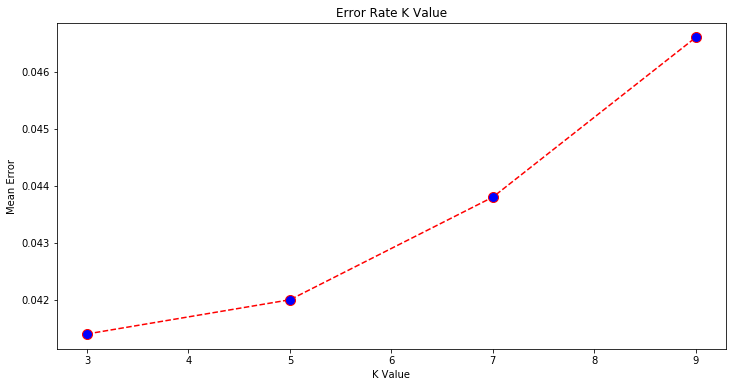

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(3, 10,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

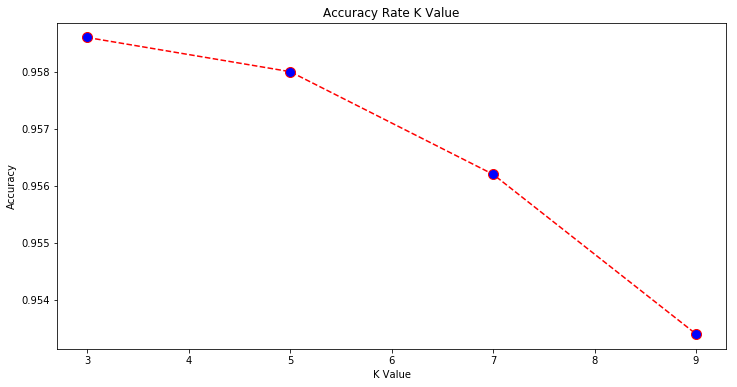

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(3, 10,2), accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

Error rate is lowest at K=3 on validation data. 

Reading test data for prediction using K=3

In [58]:
X_test= pd.read_csv('./Datasets/q1/test.csv') .values 
y_test= pd.read_csv("./Datasets/q1/test_labels.csv") .values 

X_test = X_test / 255

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [74]:
print(y_pred[180],y_test[180])

2 [2]


KNN Implementation from scratch

In [91]:
from q1 import KNNClassifier as knc

In [92]:
knn_classifier = knc()
knn_classifier.train('./Datasets/q1/train.csv')

Number of training samples
19999


In [95]:
k_list=[3,5,7,9,11]
knn_classifier.evaluate(k_list)
knn_classifier.getEvaluationMetrics()

Number of training samples
19999

Num of Clusters: 3
In Predict

Validation Accuracy : 0.9594

Num of Clusters: 5
In Predict

Validation Accuracy : 0.9588

Num of Clusters: 7
In Predict

Validation Accuracy : 0.9568

Num of Clusters: 9
In Predict

Validation Accuracy : 0.9532

Num of Clusters: 11
In Predict

Validation Accuracy : 0.9524

Num of Clusters: 13
In Predict

Validation Accuracy : 0.9502

Num of Clusters: 15
In Predict

Validation Accuracy : 0.9472

￼

Num of Clusters: 3

Confusion matrix:
[[499   0   0   0   0   1   1   0   0   0]
 [  0 555   1   1   1   0   0   4   0   0]
 [  9  11 461   3   1   1   1  11   6   0]
 [  0   2   4 477   0   6   1   3   2   4]
 [  0   5   0   0 456   0   6   0   2  14]
 [  2   1   1   4   0 424   6   1   4   4]
 [  1   0   0   0   2   1 502   0   0   0]
 [  0   9   3   0   0   1   0 484   1   3]
 [  2   6   0  11   2   3   3   2 446   4]
 [  1   0   1   3   6   1   0  10   3 493]]

Classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       501
          1       0.94      0.99      0.96       562
          2       0.98      0.91      0.95       504
          3       0.96      0.96      0.96       499
          4       0.97      0.94      0.96       483
          5       0.97      0.95      0.96       447
          6       0.97      0.99      0.98       506
          7       0.94      0.97      0.95       501
          8       0.96      0.93      0.95       479
          9       0.94      0.95      0.95       518

avg / total       0.96      0.96      0.96      5000


Num of Clusters: 5

Confusion matrix:
[[498   0   0   0   0   1   2   0   0   0]
 [  0 554   2   0   1   0   0   4   0   1]
 [  6   9 467   4   2   1   0  10   4   1]
 [  0   2   6 474   0   7   0   4   2   4]
 [  0   6   0   0 455   0   7   0   1  14]
 [  2   2   1   6   0 424   6   0   2   4]
 [  1   0   0   0   2   2 501   0   0   0]
 [  0   9   3   0   1   1   0 483   1   3]
 [  3   6   1   8   2   4   3   2 446   4]
 [  1   1   1   3   6   1   0  12   1 492]]

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       501
          1       0.94      0.99      0.96       562
          2       0.97      0.93      0.95       504
          3       0.96      0.95      0.95       499
          4       0.97      0.94      0.96       483
          5       0.96      0.95      0.95       447
          6       0.97      0.99      0.98       506
          7       0.94      0.96      0.95       501
          8       0.98      0.93      0.95       479
          9       0.94      0.95      0.95       518

avg / total       0.96      0.96      0.96      5000


Num of Clusters: 7

Confusion matrix:
[[498   0   0   1   0   1   1   0   0   0]
 [  0 554   2   0   2   0   0   3   0   1]
 [ 10  11 460   5   1   1   0  12   3   1]
 [  0   2   5 475   0   5   0   4   4   4]
 [  0   6   0   0 451   0   6   0   1  19]
 [  2   3   0   4   0 427   6   0   1   4]
 [  1   0   0   0   2   2 501   0   0   0]
 [  0   8   4   0   1   1   0 484   0   3]
 [  3   7   1   8   3   6   2   2 442   5]
 [  1   1   1   4   4   1   0  13   1 492]]

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       501
          1       0.94      0.99      0.96       562
          2       0.97      0.91      0.94       504
          3       0.96      0.95      0.95       499
          4       0.97      0.93      0.95       483
          5       0.96      0.96      0.96       447
          6       0.97      0.99      0.98       506
          7       0.93      0.97      0.95       501
          8       0.98      0.92      0.95       479
          9       0.93      0.95      0.94       518

avg / total       0.96      0.96      0.96      5000


Num of Clusters: 9

Confusion matrix:
[[498   0   0   1   0   1   1   0   0   0]
 [  0 554   2   0   0   0   0   5   0   1]
 [ 11  13 455   3   1   1   0  14   5   1]
 [  2   4   4 472   0   8   1   3   1   4]
 [  0   7   0   0 452   0   6   0   1  17]
 [  2   4   0   4   0 423   6   0   1   7]
 [  1   0   0   0   2   2 501   0   0   0]
 [  0  11   2   0   1   1   0 481   1   4]
 [  3   7   1  10   3   6   2   1 439   7]
 [  1   1   2   5   5   1   0  11   1 491]]

Classification report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       501
          1       0.92      0.99      0.95       562
          2       0.98      0.90      0.94       504
          3       0.95      0.95      0.95       499
          4       0.97      0.94      0.95       483
          5       0.95      0.95      0.95       447
          6       0.97      0.99      0.98       506
          7       0.93      0.96      0.95       501
          8       0.98      0.92      0.95       479
          9       0.92      0.95      0.94       518

avg / total       0.95      0.95      0.95      5000


Num of Clusters: 11

Confusion matrix:
[[496   0   0   1   0   1   2   0   0   1]
 [  0 555   2   0   0   0   0   3   0   2]
 [ 10  13 456   3   2   2   0  14   3   1]
 [  1   4   4 472   0   7   2   4   1   4]
 [  0   8   0   0 452   0   6   0   1  16]
 [  2   4   0   5   0 422   7   0   1   6]
 [  2   0   0   0   2   1 501   0   0   0]
 [  0  11   2   0   1   1   0 479   1   6]
 [  3   7   0   8   3   8   2   1 438   9]
 [  1   3   2   5   5   1   0   9   1 491]]

Classification report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       501
          1       0.92      0.99      0.95       562
          2       0.98      0.90      0.94       504
          3       0.96      0.95      0.95       499
          4       0.97      0.94      0.95       483
          5       0.95      0.94      0.95       447
          6       0.96      0.99      0.98       506
          7       0.94      0.96      0.95       501
          8       0.98      0.91      0.95       479
          9       0.92      0.95      0.93       518

avg / total       0.95      0.95      0.95      5000


Num of Clusters: 13

Confusion matrix:
[[496   0   0   1   0   1   2   0   0   1]
 [  0 556   2   0   0   0   0   3   0   1]
 [ 10  15 456   3   2   2   0  12   3   1]
 [  1   5   4 473   0   6   1   4   2   3]
 [  0   8   0   0 449   0   6   0   1  19]
 [  2   5   0   5   0 421   6   0   0   8]
 [  1   0   0   0   2   1 501   0   1   0]
 [  0  12   2   0   1   1   0 479   1   5]
 [  3   7   1   8   3   8   4   1 434  10]
 [  1   3   2   7   6   1   0  11   1 486]]

Classification report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       501
          1       0.91      0.99      0.95       562
          2       0.98      0.90      0.94       504
          3       0.95      0.95      0.95       499
          4       0.97      0.93      0.95       483
          5       0.95      0.94      0.95       447
          6       0.96      0.99      0.98       506
          7       0.94      0.96      0.95       501
          8       0.98      0.91      0.94       479
          9       0.91      0.94      0.92       518

avg / total       0.95      0.95      0.95      5000


Num of Clusters: 15

Confusion matrix:
[[495   0   0   1   0   1   2   1   0   1]
 [  0 556   1   1   0   0   0   3   0   1]
 [  9  16 454   3   2   3   0  12   4   1]
 [  1   4   4 471   0   6   2   3   4   4]
 [  0   8   0   0 447   0   6   0   1  21]
 [  2   5   0   7   0 420   7   0   0   6]
 [  2   0   0   0   2   1 501   0   0   0]
 [  0  12   2   0   1   1   0 480   1   4]
 [  2   7   1  11   3  10   4   1 429  11]
 [  1   3   2   9   5   1   0  13   1 483]]

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       501
          1       0.91      0.99      0.95       562
          2       0.98      0.90      0.94       504
          3       0.94      0.94      0.94       499
          4       0.97      0.93      0.95       483
          5       0.95      0.94      0.94       447
          6       0.96      0.99      0.97       506
          7       0.94      0.96      0.95       501
          8       0.97      0.90      0.93       479
          9       0.91      0.93      0.92       518

avg / total       0.95      0.95      0.95      5000

Number of test samples
999

In [97]:

predictions = knn_classifier.predict2('./Datasets/q1/test.csv',3)
#test_labels = list()
#with open("./Datasets/q1/test_labels.csv") as f:
#  for line in f:
#    test_labels.append(int(line))

mnist_test_labels=r'Datasets/q1/test_labels.csv'
print('Number of test labels')
test_labels = pd.read_csv(mnist_test_labels).values 
print(len(test_labels))
print (accuracy_score(test_labels, predictions)*100.0)

Number of test samples
999
Predicted  4
Predicted  7
Predicted  1
Predicted  7
Predicted  6
Predicted  6
Predicted  4
Predicted  2
Predicted  3
Predicted  5
Predicted  1
Predicted  6
Predicted  4
Predicted  7
Predicted  9
Predicted  5
Predicted  1
Predicted  5
Predicted  3
Predicted  8
Predicted  5
Predicted  4
Predicted  6
Predicted  0
Predicted  9
Predicted  6
Predicted  5
Predicted  2
Predicted  7
Predicted  8
Predicted  6
Predicted  6
Predicted  5
Predicted  6
Predicted  6
Predicted  5
Predicted  7
Predicted  9
Predicted  3
Predicted  9
Predicted  0
Predicted  7
Predicted  6
Predicted  7
Predicted  5
Predicted  1
Predicted  9
Predicted  1
Predicted  1
Predicted  7
Predicted  7
Predicted  9
Predicted  1
Predicted  4
Predicted  9
Predicted  0
Predicted  3
Predicted  2
Predicted  9
Predicted  6
Predicted  7
Predicted  9
Predicted  6
Predicted  4
Predicted  3
Predicted  9
Predicted  6
Predicted  9
Predicted  2
Predicted  0
Predicted  4
Predicted  7
Predicted  2
Predicted  1
Predicted  

Predicted  6
Predicted  1
Predicted  9
Predicted  0
Predicted  8
Predicted  5
Predicted  3
Predicted  0
Predicted  8
Predicted  2
Predicted  3
Predicted  8
Predicted  9
Predicted  9
Predicted  0
Predicted  2
Predicted  1
Predicted  1
Predicted  4
Predicted  8
Predicted  5
Predicted  9
Predicted  3
Predicted  3
Predicted  3
Predicted  9
Predicted  2
Predicted  4
Predicted  5
Predicted  1
Predicted  9
Predicted  3
Predicted  8
Predicted  1
Predicted  2
Predicted  4
Predicted  2
Predicted  1
Predicted  7
Predicted  9
Predicted  8
Predicted  8
Predicted  0
Predicted  5
Predicted  0
Predicted  0
Predicted  6
Predicted  1
Predicted  8
Predicted  4
Predicted  6
Predicted  5
Predicted  3
Predicted  5
Predicted  0
Predicted  8
Predicted  7
Predicted  5
Predicted  8
Predicted  5
Predicted  6
Predicted  0
Predicted  1
Predicted  7
Predicted  7
Predicted  5
Predicted  3
Predicted  5
Predicted  5
Predicted  2
Predicted  1
Predicted  9
Predicted  0
Predicted  0
Predicted  9
Predicted  4
Predicted  5

In [98]:
print('Testing Accuracy')
print (accuracy_score(test_labels, predictions)*100.0)

Testing Accuracy
95.995995996
